# Machine Learning Mini Project
## <i> For Regression

__About Data__: <br>The data has been taken from US Data on Unemployment, Education, Population and Poverty. I wanted to test if the pverty estimates could be predicted for a county if other parameters like its demography, education levels and urbanization are given. We know that there exist a cause and effect relationship, but how strong could it be?
<br> The data is taken for the year 2017.

__Project Aim__: The main objective is to compare the effectiveness of multiple machine learning regressions to correctly predict the poverty rate in 2017 based on the other socio-economic indicators

In [1]:
import pandas as pd

unemployment_df = pd.read_excel(r'E:\Machine Learning\Social Data\Unemployment_2017.xls', index_col = [0])
education_df = pd.read_excel(r'E:\Machine Learning\Social Data\Education_2017.xls',index_col = [0])
population_df = pd.read_excel(r'E:\Machine Learning\Social Data\PopulationEstimates_2017.xls',header = 2, index_col = [0,])
poverty_df = pd.read_excel(r'E:\Machine Learning\Social Data\PovertyEstimates_2017.xls', index_col = [0])

In [3]:
%matplotlib inline
unemployment_df.iloc[:,1].head()

FIPS
0        United States
1000           Alabama
1001    Autauga County
1003    Baldwin County
1005    Barbour County
Name: Area_name, dtype: object

In [4]:
poverty_df.head()

,State,Area_Name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2017,PCTPOVALL_2017
FIPStxt,,,,,,,,
0,US,United States,NaN,NaN,NaN,NaN,42583651.0,13.4
1000,AL,Alabama,NaN,NaN,NaN,NaN,802263.0,16.9
1001,AL,Autauga County,2.0,2.0,2.0,2.0,7390.0,13.4
1003,AL,Baldwin County,4.0,5.0,3.0,2.0,21199.0,10.1
1005,AL,Barbour County,6.0,6.0,6.0,6.0,7414.0,33.4


In [5]:
population_df.head()

,State,Area_Name,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2013,Economic_typology_2015,POP_ESTIMATE_2017,N_POP_CHG_2017,Births_2017,Deaths_2017,NATURAL_INC_2017,INTERNATIONAL_MIG_2017,DOMESTIC_MIG_2017,RESIDUAL_2017,GQ_ESTIMATES_2017,GQ_ESTIMATES_2018,R_birth_2017,R_death_2017,R_NATURAL_INC_2017,R_INTERNATIONAL_MIG_2017,R_DOMESTIC_MIG_2017
FIPS,,,,,,,,,,,,,,,,,,,,
0,US,United States,NaN,NaN,NaN,325147121,2075779.0,3901982.0,2779436.0,1122546.0,953233.0,0.0,0.0,8086688.0,8091609.0,NaN,NaN,NaN,NaN,NaN
1000,AL,Alabama,NaN,NaN,NaN,4875120,10375.0,58259.0,53033.0,5226.0,3190.0,2065.0,-106.0,117456.0,117443.0,11.962999,10.889884,1.073115,0.655040,0.424031
1001,AL,Autauga County,2.0,2.0,0.0,55443,201.0,660.0,512.0,148.0,-2.0,59.0,-4.0,455.0,455.0,11.925735,9.251479,2.674256,-0.036139,1.066088
1003,AL,Baldwin County,3.0,2.0,5.0,212619,4907.0,2282.0,2124.0,158.0,113.0,4623.0,13.0,2193.0,2190.0,10.858109,10.106321,0.751788,0.537672,21.996950
1005,AL,Barbour County,6.0,6.0,3.0,25158,-661.0,273.0,298.0,-25.0,12.0,-650.0,2.0,2818.0,2820.0,10.710713,11.691547,-0.980834,0.470801,-25.501697


In [7]:
education_df.head()

,State,Area name,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
FIPS Code,,,,,,,,,,
0,US,United States,27437114.0,59093612.0,62853315.0,66887603.0,12.7,27.3,29.1,30.9
1000,AL,Alabama,481059.0,1012551.0,979449.0,803578.0,14.7,30.9,29.9,24.5
1001,AL,Autauga County,4521.0,12363.0,10697.0,9176.0,12.3,33.6,29.1,25.0
1003,AL,Baldwin County,13997.0,39771.0,45286.0,43968.0,9.8,27.8,31.7,30.7
1005,AL,Barbour County,4960.0,6549.0,4707.0,2218.0,26.9,35.5,25.5,12.0


__Observation 1__: We observe that dataframe has United States and its 50 States in the observation. SInce it is the study about counties we would remove them. <br> Then we would join each of the table by the county name and put them into new dataframe

In [8]:
# Drop the values which have missing value for Rural/ Urban city codes i.e rows with USA and its states

unemployment_df.columns
unemployment_df = unemployment_df.dropna(axis =0, subset = ['Rural_urban_continuum_code_2013'])

poverty_df.columns
poverty_df = poverty_df.dropna(axis =0, subset = ['Rural-urban_Continuum_Code_2013'])

population_df.columns[4:]
population_df = population_df.dropna(axis =0, subset = ['Rural-urban_Continuum Code_2013'])

# Joining other data on poverty data since it has the least rows
# Create a  new 'dataset' for this
dataset = poverty_df.copy()
dataset.drop(dataset.columns[[0,1,2,3]], axis = 1, inplace = True)

dataset = dataset.join(education_df)
dataset.drop(['State', 'Area name'], axis = 1, inplace = True)


dataset = dataset.join(population_df[population_df.columns[4:]])

dataset = dataset.join(unemployment_df[unemployment_df.columns[4:]])

dataset.isnull().sum()

dataset.dropna(inplace = True)

In [9]:
dataset.head(3)

,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2017,PCTPOVALL_2017,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17",...,R_death_2017,R_NATURAL_INC_2017,R_INTERNATIONAL_MIG_2017,R_DOMESTIC_MIG_2017,Metro_2013,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017
FIPStxt,,,,,,,,,,,,,,,,,,,,,
1001,2.0,2.0,7390.0,13.4,4521.0,12363.0,10697.0,9176.0,12.3,33.6,...,9.251479,2.674256,-0.036139,1.066088,1.0,25972.0,24958.0,1014.0,3.9,58343.0
1003,3.0,2.0,21199.0,10.1,13997.0,39771.0,45286.0,43968.0,9.8,27.8,...,10.106321,0.751788,0.537672,21.996950,1.0,92090.0,88342.0,3748.0,4.1,56607.0
1005,6.0,6.0,7414.0,33.4,4960.0,6549.0,4707.0,2218.0,26.9,35.5,...,11.691547,-0.980834,0.470801,-25.501697,0.0,8317.0,7831.0,486.0,5.8,32490.0


__Observation 2:__ Now our data is ready it is important to see how each feature is associated with each other.<br> We should be careful for collinearity of our features especially when we use Linear Regression

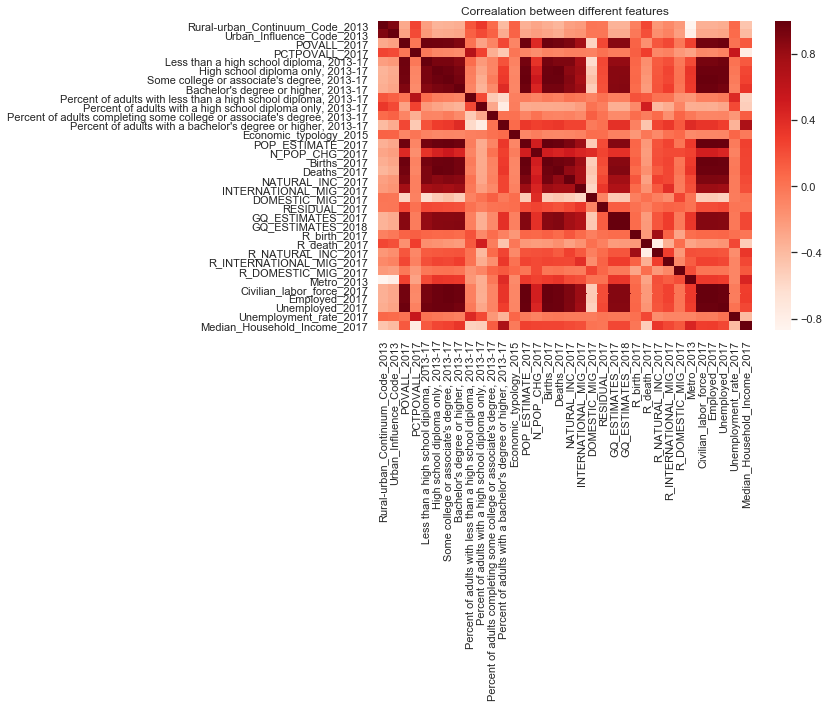

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.title('Correalation between different features')
plt.tight_layout()

__Observation 3:__ We observe a strong collinearity between several features. <br> For linear regression we need to:<br>a) Seperate the target variable - 'poverty rate' from other variables <br>b) Standardize/Scale the features <br>c) Split data for training and testing <br>d) Remove the collinear feature to increase R-value and keeping p-values below zero in testing data

In [16]:
# I observed that while importing file I had mistakenly taken one feature for 2018, I would remove that now
X = dataset.drop(dataset[['POVALL_2017', 'PCTPOVALL_2017', 'GQ_ESTIMATES_2018']], axis = 1)

y = np.array(dataset['PCTPOVALL_2017'])


# We would standardise the features using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

X.head(3)

,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",...,R_death_2017,R_NATURAL_INC_2017,R_INTERNATIONAL_MIG_2017,R_DOMESTIC_MIG_2017,Metro_2013,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Median_Household_Income_2017
0,-1.111167,-0.934232,-0.111392,-0.127486,-0.154137,-0.156380,-0.232960,-0.114486,-0.284999,0.408374,...,-0.385435,0.384118,-0.513224,0.092813,1.302358,-0.150023,-0.149443,-0.159624,-0.418257,0.537387
1,-0.741914,-0.934232,0.139086,0.414187,0.418299,0.292565,-0.618875,-0.925879,0.221072,1.022500,...,-0.060904,-0.087972,-0.255469,1.701861,1.302358,0.245884,0.247782,0.201571,-0.298368,0.408754
2,0.365843,0.209012,-0.099788,-0.242390,-0.253269,-0.246163,2.020787,0.151315,-0.985712,-0.992263,...,0.540908,-0.513443,-0.285507,-1.949571,-0.767838,-0.255739,-0.256777,-0.229379,0.720689,-1.378244


In [22]:
## splitting the training and testing parameters with default ratio of 75:25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

__<i> We would use the OLS method from sklearn in a loop for backward elimination of the features</i>__

In [24]:
#Backward Elimination
#Linear regression model using OLS
import statsmodels.api as sm

cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        print("\n",feature_with_p_max, pmax)
        cols.remove(feature_with_p_max)
    else:
        break


 Employed_2017 0.9993740978772733

 Percent of adults completing some college or associate's degree, 2013-17 0.9916971237968343

 Urban_Influence_Code_2013 0.9734780224027046

 Deaths_2017 0.9766557063785051

 DOMESTIC_MIG_2017 0.9070570117245489

 R_NATURAL_INC_2017 0.9039751721813785

 INTERNATIONAL_MIG_2017 0.4530153082661168

 Bachelor's degree or higher, 2013-17 0.21228696251884205

 High school diploma only, 2013-17 0.12305400065985582

 RESIDUAL_2017 0.1549032108901677

 Metro_2013 0.10072347515340954

 Percent of adults with a high school diploma only, 2013-17 0.05531948723379797


Now we know the features with higher p-values. <br> The X_test was trained with the remaining features. The value of those features is stored in a list 'cols'

In [26]:
cols

['Rural-urban_Continuum_Code_2013',
 'Less than a high school diploma, 2013-17',
 "Some college or associate's degree, 2013-17",
 'Percent of adults with less than a high school diploma, 2013-17',
 "Percent of adults with a bachelor's degree or higher, 2013-17",
 'Economic_typology_2015',
 'POP_ESTIMATE_2017',
 'N_POP_CHG_2017',
 'Births_2017',
 'NATURAL_INC_2017',
 'GQ_ESTIMATES_2017',
 'R_birth_2017',
 'R_death_2017',
 'R_INTERNATIONAL_MIG_2017',
 'R_DOMESTIC_MIG_2017',
 'Civilian_labor_force_2017',
 'Unemployed_2017',
 'Unemployment_rate_2017',
 'Median_Household_Income_2017']

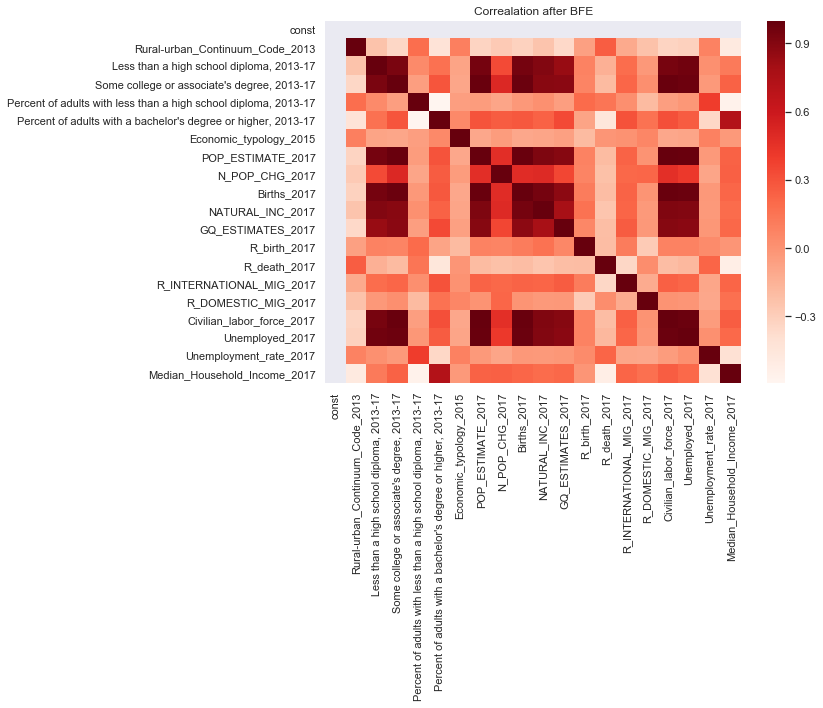

In [32]:
sns.set()
plt.figure(figsize=(12,10))
cor = X_1.corr() # assigning just selected feature value
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.title('Correalation after BFE')
plt.tight_layout()

__Conclusion__ We still see some correlation but not as high as with the original dataset. Let us see the regression results to understand  more

__OLS Regression Results__

In [28]:
X_train = sm.add_constant(X_train[cols]) # We will use only non eliminated features
X_test = sm.add_constant(X_test[cols])
ols = sm.OLS(y_train,X_train)
lr = ols.fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     406.9
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:43:51   Log-Likelihood:                -5963.3
No. Observations:                2355   AIC:                         1.197e+04
Df Residuals:                    2335   BIC:                         1.208e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Our dataset has R^2 value of 76.8  <br>All the feature have p-value below zero <br> But, Kurtosis is high that means chances of outliers are more

We will explore the accuracy with Linear Regression now

__Now we will test the results for testing__
### A. Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
print("Mean Squared Error for Test and Prediction: ",mean_squared_error(y_test,y_pred))
print("R squared score for target test vs prediction: ",r2_score(y_test,y_pred))
print("R squared score for target trained vs prediction: ",r2_score(y_train,model.predict(X_train)))

Mean Squared Error for Test and Prediction:  7.3302723473154385
R squared score for target test vs prediction:  0.80558830134718
R squared score for target trained vs prediction:  0.7680201418914807


### B. KNN Regression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) # no need for feature elimination in KNN

from sklearn import neighbors
rmse_val = [] #to store mse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = (mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error)

Text(0.5, 1.0, 'Estimating the k neighbours for MSE')

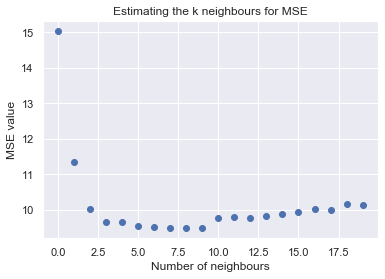

In [53]:
plt.scatter(range(20),rmse_val)
plt.ylabel("MSE value")
plt.xlabel("Number of neighbours")
plt.title("Estimating the k neighbours for MSE")

As the result shows that for k=9, we could expect optimum result for prediction

In [60]:
model = neighbors.KNeighborsRegressor(n_neighbors = 9)
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
print("Mean Squared Error for Test and Prediction: ",mean_squared_error(y_test,y_pred))
print("R squared score for target test vs prediction: ",r2_score(y_test,y_pred))
print("R squared score for target trained vs prediction: ",r2_score(y_train,model.predict(X_train)))

Mean Squared Error for Test and Prediction:  9.495893726635883
R squared score for target test vs prediction:  0.7481522183417864
R squared score for target trained vs prediction:  0.7944155640817352


__Observation 4:__ We could notice that the performance of KNN regressor is poorer than Linear Regressor. KNN in general is not known to be effective for Regression. And our comaparison above prooves that

### C. SVM Regression

C:\Users\Kshitij\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


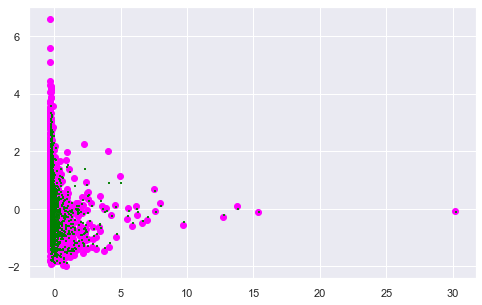

In [83]:
y_svm = pd.DataFrame(y)
y_svm = sc.fit_transform(y_svm)
X_train, X_test, y_train, y_test = train_test_split(X,y_svm,random_state=0)

from sklearn.svm import SVR

# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. 
#We have a non-linear condition 
#so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
model = SVR(kernel='rbf', gamma = 'auto')
model.fit(X_train,y_train)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(X_train['POP_ESTIMATE_2017'], y_train, color = 'magenta')
plt.scatter(X_train['POP_ESTIMATE_2017'], model.predict(X_train), color = 'green', s =1, marker = ",")

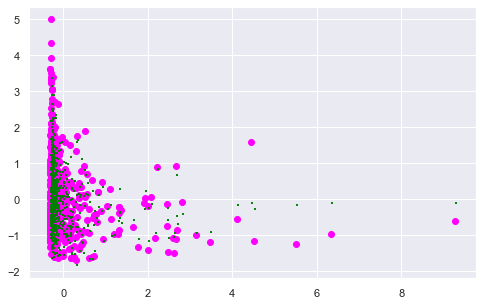

In [84]:
plt.figure(figsize=(8,5))
plt.scatter(X_test['POP_ESTIMATE_2017'], y_test, color = 'magenta')
plt.scatter(X_test['POP_ESTIMATE_2017'], model.predict(X_test), color = 'green', s =1, marker = ",")

In [86]:
y_pred = model.predict(X_test)

print("Mean Squared Error for Test and Prediction: ",mean_squared_error(y_test,y_pred))
print("R squared score for target test vs prediction: ",r2_score(y_test,y_pred))
print("R squared score for target trained vs prediction: ",r2_score(y_train,model.predict(X_train)))

Mean Squared Error for Test and Prediction:  0.13718765689007192
R squared score for target test vs prediction:  0.8566793228442869
R squared score for target trained vs prediction:  0.8872224737180526


### D. Adaboost Regression

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error for Test and Prediction: ",mean_squared_error(y_test,y_pred))
print("R squared score for target test vs prediction: ",r2_score(y_test,y_pred))
print("R squared score for target trained vs prediction: ",r2_score(y_train,model.predict(X_train)))

Mean Squared Error for Test and Prediction:  8.419494484910356
R squared score for target test vs prediction:  0.7767002169832156
R squared score for target trained vs prediction:  0.8151939304733458


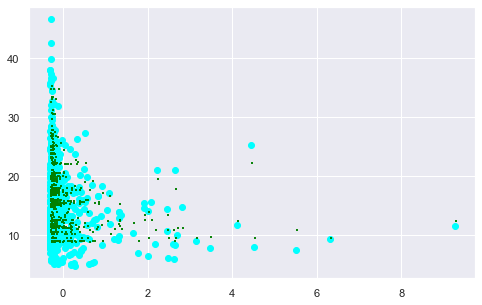

In [108]:
plt.figure(figsize=(8,5))
plt.scatter(X_test['POP_ESTIMATE_2017'], y_test, color = 'cyan')
plt.scatter(X_test['POP_ESTIMATE_2017'], model.predict(X_test), color = 'green', s =1, marker = ",")

### E. Random Forest Regression

In [95]:
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(X,y,random_state=0)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100)
model.fit(Xrf_train,yrf_train)
yrf_pred = model.predict(Xrf_test)

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

print("Mean Squared Error for Test and Prediction: ",mean_squared_error(yrf_test,yrf_pred))
print("R squared score for target test vs prediction: ",r2_score(yrf_test,yrf_pred))
print("R squared score for target trained vs prediction: ",r2_score(yrf_train,model.predict(Xrf_train)))


Mean Squared Error for Test and Prediction:  3.940777099236638
R squared score for target test vs prediction:  0.8954836691497133
R squared score for target trained vs prediction:  0.9820500805673079


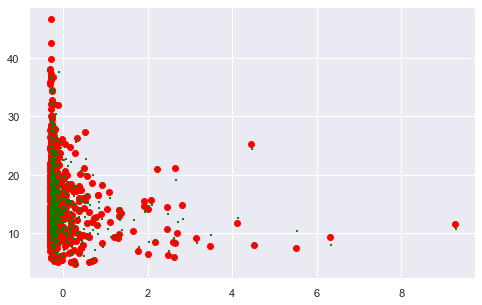

In [109]:
plt.figure(figsize=(8,5))
plt.scatter(Xrf_test['POP_ESTIMATE_2017'], yrf_test, color = 'red')
plt.scatter(Xrf_test['POP_ESTIMATE_2017'], yrf_pred, color = 'green', s =1, marker = ",")

## Conclusion:
__We have tested various regression models for predicting, namely__:
<br>1. Linear Regression
<br>2. KNN Regression
<br>3. SVM Regression
<br>4. Adaboost with Decision Tree Regression
<br>5. Random Forest Regression
<br> The result from running the different regression types are presented in the table below:

| Regression Type | Mean Squared Error | R2 - Test vs Pred | R2 - Train vs Pred |
| --- | --- | --- | --- |
| Linear Regression | 7.33 | 0.81 | 0.77 |
| KNN Regression | 9.50 | 0.75 | 0.79 |
| SVM Regression | 0.14 | 0.86 | 0.89 |
| Adaboost Regression | 8.42 | 0.78 | 0.82 |
| Random Forest Regression | 3.94 | 0.90 | 0.98 |

__Results__: Even when the MSE value for SVM is less the R2 value is highest for the Random Forest Regression.

__Figure 1__ The _Correlation Matrix_ for the feature is presented in the figure below:

<img src="Correlationmatrix.png">

__Figure 2__ The pvalue for the independent feature is below:

<img src="pvalue.png">

__Figure 3__ Comparison of SVM, Adaboost and Random Forest Regression Models

<img src="RegressionComparison1.png">